In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pylab as pl
%matplotlib inline

In [2]:
if os.getenv ('PUI2016') is None:
    print("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print("Must set env variable PUI2016")


In [3]:
def getCitiBikeCSV(datestring):
    
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

            if '2014' in datestring or '2013' in datestring:
                    os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                              "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

            print("File in place, you can continue.")
            
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
                print("WARNING!!! something is wrong: the file is not there!")
    else:
        print("File in place, you can continue.")

In [4]:
datestring = "201501"
getCitiBikeCSV(datestring)

('Downloading', '201501')
File in place, you can continue.


In [5]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()

In [6]:
df['date'] = pd.to_datetime(df['starttime'])

In [ ]:
#df.head()

In [ ]:
#df.columns

In [7]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year','gender'], axis=1, inplace=True)

In [10]:
df.head()

,tripduration,date,isFirstHalf
0,1346,2015-01-01 00:01:00,0
1,363,2015-01-01 00:02:00,0
2,346,2015-01-01 00:04:00,0
3,182,2015-01-01 00:04:00,0
4,969,2015-01-01 00:05:00,0


### Question to figure out: Was there a differnce of tripduration between the first half and the second half of a month ( e.g. January 2015)
### Null hypothesis: biking tripdurations in first half of January (2015) was more than the second half.
### Alternative hypothesis: biking tripdurations in first half of January (2015) was equal or less than the second half.
### I use a significance level $\alpha=0.05$


In [11]:
is_firstHalf = lambda x: 0 if x.day <= 15 else 1
df["isFirstHalf"] = df.date.apply(is_firstHalf)

In [12]:
df.head()

,tripduration,date,isFirstHalf
0,1346,2015-01-01 00:01:00,0
1,363,2015-01-01 00:02:00,0
2,346,2015-01-01 00:04:00,0
3,182,2015-01-01 00:04:00,0
4,969,2015-01-01 00:05:00,0


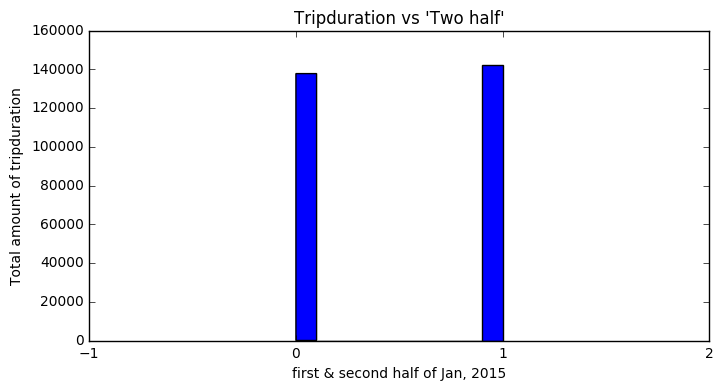

In [13]:
plt.figure(figsize=(8,4))

plt.hist(df.isFirstHalf)

plt.ylabel("Total amount of tripduration"); plt.xlabel("first & second half of Jan, 2015")
plt.title("Tripduration vs 'Two half'")
plt.xticks(np.arange(-1,3))
plt.show()

# 0 stands for the first half & 1 stands for the second half

### Second half of Jan of 2015, more people biking!